Take Home Data Challenge

In [2]:
from google.colab import files

#Upload the file manually
uploaded = files.upload()

#Get the file name dynamically
file_name = list(uploaded.keys())[0]

print(f"Uploaded file: {file_name}")


Saving 500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250315.xls.csv to 500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250315.xls.csv
Uploaded file: 500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250315.xls.csv


In [2]:
import pandas as pd
df = pd.read_csv(file_name)
df.head()

NameError: name 'file_name' is not defined

Filtering the census data to reduce the size

In [1]:
#Define key columns for analysis
selected_columns = [
    "StateAbbr", "PlaceFIPS", "TractFIPS", "Population2010",
    "ACCESS2_CrudePrev", "DIABETES_CrudePrev", "OBESITY_CrudePrev", "PHLTH_CrudePrev",
    "LPA_CrudePrev", "CSMOKING_CrudePrev", "DENTAL_CrudePrev", "CHECKUP_CrudePrev"
]

existing_columns = [col for col in selected_columns if col in df.columns]
missing_columns = list(set(selected_columns) - set(existing_columns))

#Filter dataset
df_filtered = df[existing_columns]

#Save the cleaned dataset as CSV for faster processing
df_filtered.to_csv("cleaned_census_data.csv", index=False)



NameError: name 'df' is not defined

In [ ]:
df_filtered.to_csv("cleaned_census_data.csv", index=False)
print("Cleaned dataset saved as CSV in the current working directory.")

✅ Cleaned dataset saved as CSV in the current working directory.


In [ ]:
from google.colab import files

#Upload the file manually
uploaded = files.upload()

#Get the file name dynamically
food_atlas = list(uploaded.keys())[0]

print(f"Uploaded file: {food_atlas}")

Saving FoodEnvironmentAtlas.xlsx to FoodEnvironmentAtlas (2).xlsx
Uploaded file: FoodEnvironmentAtlas (2).xlsx


Mergin relevant sheets from food atlas with census data using PlaceFips and Fips columns

In [ ]:

census_file_path = "cleaned_census_data.csv"
df_census = pd.read_csv(census_file_path, dtype=str)

food_atlas_file_path = "FoodEnvironmentAtlas.xlsx"
xls = pd.ExcelFile(food_atlas_file_path)


df_census["TractFIPS"] = df_census["TractFIPS"].astype(str).str.zfill(11)
df_census["County_FIPS"] = df_census["TractFIPS"].str[:5]

selected_columns = {
    "ACCESS": ["FIPS", "LACCESS_POP10", "PCT_LACCESS_POP10", "LACCESS_LOWI10", "PCT_LACCESS_LOWI10"],
    "STORES": ["FIPS", "GROC16", "SUPERCPTH16", "CONVSPTH16"],
    "RESTAURANTS": ["FIPS", "FFRPTH16", "FSRPTH16"],
    "ASSISTANCE": ["FIPS", "PCT_SNAP17", "PCT_FREE_LUNCH15", "PCT_WIC17"],
    "INSECURITY": ["FIPS", "FOODINSEC_15_17", "VLFOODSEC_15_17"],
    "SOCIOECONOMIC": ["FIPS", "POVRATE15", "CHILDPOVRATE15", "PCT_65OLDER10", "PCT_18YOUNGER10"],
}

#Load and merge selected Food Atlas data
df_food_atlas = None

for sheet, cols in selected_columns.items():
    df_temp = pd.read_excel(xls, sheet_name=sheet, dtype=str, usecols=cols)
    df_temp["FIPS"] = df_temp["FIPS"].astype(str).str.zfill(5)  # Ensure 5-digit format for merging

    if df_food_atlas is None:
        df_food_atlas = df_temp
    else:
        df_food_atlas = df_food_atlas.merge(df_temp, on="FIPS", how="outer")

#Merge Census Data with Food Atlas Data using County FIPS
df_merged = df_census.merge(df_food_atlas, left_on="County_FIPS", right_on="FIPS", how="left")


df_merged.drop(columns=["FIPS"], inplace=True)
df_merged.to_csv("merged_census_food_data.csv", index=False)
print("✅ Merged dataset saved as 'merged_census_food_data.csv'")

df_merged.head()

✅ Merged dataset saved as 'merged_census_food_data.csv'


,StateAbbr,PlaceFIPS,TractFIPS,Population2010,ACCESS2_CrudePrev,DIABETES_CrudePrev,OBESITY_CrudePrev,PHLTH_CrudePrev,LPA_CrudePrev,CSMOKING_CrudePrev,...,FSRPTH16,PCT_SNAP17,PCT_FREE_LUNCH15,PCT_WIC17,FOODINSEC_15_17,VLFOODSEC_15_17,PCT_65OLDER10,PCT_18YOUNGER10,POVRATE15,CHILDPOVRATE15
0,AL,107000,01073000100,3042,24.4,17.4,46.4,20.5,44.0,27.9,...,0.594167158,16.50005631061468,42.59428605882767,2.543569610894678,16.3,7.1,13.127936749961275,23.46787837185215,18,26.2
1,AL,107000,01073000300,2735,30.4,19.8,47.8,22.2,47.5,29.3,...,0.594167158,16.50005631061468,42.59428605882767,2.543569610894678,16.3,7.1,13.127936749961275,23.46787837185215,18,26.2
2,AL,107000,01073000400,3338,24.7,18.4,45.7,19.4,43.0,25.9,...,0.594167158,16.50005631061468,42.59428605882767,2.543569610894678,16.3,7.1,13.127936749961275,23.46787837185215,18,26.2
3,AL,107000,01073000500,2864,25.2,22.4,48.0,21.7,45.9,26.3,...,0.594167158,16.50005631061468,42.59428605882767,2.543569610894678,16.3,7.1,13.127936749961275,23.46787837185215,18,26.2
4,AL,107000,01073000700,2577,29.0,25.0,52.7,25.5,52.2,30.9,...,0.594167158,16.50005631061468,42.59428605882767,2.543569610894678,16.3,7.1,13.127936749961275,23.46787837185215,18,26.2


**Q1. Where should we deploy food access program?**


1.According to Feeding America’s annual Map the Meal Gap report, counties with food insecurity rates above 15% are considered severely impacted.

2.The USDA Food Access Research Atlas considers counties where 30% or more of the population lacks food access as critically underserved.

High food insecurity (FOODINSEC_15_17 > 15%)
Low access to food (PCT_LACCESS_POP10 > 30%

In [1]:
import pandas as pd
from google.colab import files

#Upload the file manually
uploaded = files.upload()

#Get the file name dynamically
file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name, dtype=str)

#Convert relevant columns to numeric for analysis
numeric_columns = [
    "PCT_LACCESS_POP10", "PCT_LACCESS_LOWI10", "POVRATE15", "CHILDPOVRATE15",
    "FOODINSEC_15_17", "VLFOODSEC_15_17", "PCT_SNAP17", "PCT_FREE_LUNCH15",
    "PCT_WIC17", "OBESITY_CrudePrev", "DIABETES_CrudePrev", "PHLTH_CrudePrev"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Identify top counties with highest food insecurity and low access
priority_areas = df[
    (df["PCT_LACCESS_POP10"] > 30) &
    (df["FOODINSEC_15_17"] > 15)
]

#Sort by highest food insecurity
priority_areas = priority_areas.sort_values(by="FOODINSEC_15_17", ascending=False)

#Extract the list of areas (State and County FIPS)
priority_area_list = priority_areas[["StateAbbr", "County_FIPS"]].drop_duplicates()
print(priority_area_list)

Saving merged_census_food_data.csv to merged_census_food_data.csv
      StateAbbr County_FIPS
18588        NY       36093
18538        NY       36055
12800        LA       22017
14840        MO       29165
14869        MO       29183
14645        MO       29019
14843        MO       29037
12           AL       01073
155          AL       01089


**New York (NY):**
FIPS 36093: Schenectady County​

FIPS 36055: Monroe County​

**Louisiana (LA):**
FIPS 22017: Caddo Parish

**Missouri (MO):**
FIPS 29165: Platte County​

FIPS 29183: St. Charles County​

FIPS 29019: Boone County​

FIPS 29037: Cass County​

**Alabama (AL):**
FIPS 01073: Jefferson County​

FIPS 01089: Madison County

**2. How many people will be included? How many might be successfully engaged?**

Population2010: The total census tract population.

PCT_LACCESS_POP10: The percentage of the population with low food access.

FOODINSEC_15_17: The food insecurity rate.

PCT_SNAP17: The percentage of people already participating in SNAP (a proxy for engagement potential).

In [2]:
numeric_columns = [
    "Population2010", "PCT_LACCESS_POP10", "FOODINSEC_15_17",
    "PCT_SNAP17", "PCT_WIC17", "PCT_FREE_LUNCH15"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Compute affected and engaged populations
df["Low_Access_Population"] = (df["PCT_LACCESS_POP10"] / 100) * df["Population2010"]
df["Food_Insecure_Population"] = (df["FOODINSEC_15_17"] / 100) * df["Population2010"]
df["Engaged_Population"] = ((df["PCT_SNAP17"] / 100) + (df["PCT_WIC17"] / 100) + (df["PCT_FREE_LUNCH15"] / 100)) * df["Population2010"]

#Filter for priority counties (New York and high-need areas)
priority_counties = ["36093", "36055", "22017", "29165", "29183", "29019", "29037", "01073", "01089"]
df_priority = df[df["County_FIPS"].isin(priority_counties)]

#Select key columns for analysis
df_priority_summary = df_priority[["StateAbbr", "County_FIPS", "Population2010", "Low_Access_Population",
                                   "Food_Insecure_Population", "Engaged_Population"]]

df_priority_summary


,StateAbbr,County_FIPS,Population2010,Low_Access_Population,Food_Insecure_Population,Engaged_Population
0,AL,01073,3042,966.752053,495.846,1875.025282
1,AL,01073,2735,869.187003,445.805,1685.796893
2,AL,01073,3338,1060.821286,544.094,2057.473502
3,AL,01073,2864,910.183392,466.832,1765.309799
4,AL,01073,2577,818.974372,420.051,1588.408992
...,...,...,...,...,...,...
18584,NY,36093,4102,1474.870227,734.258,2212.527736
18585,NY,36093,6401,2301.473506,1145.779,3452.557298
18586,NY,36093,3429,1232.893712,613.791,1849.526476
18587,NY,36093,3150,1132.579526,563.850,1699.040070


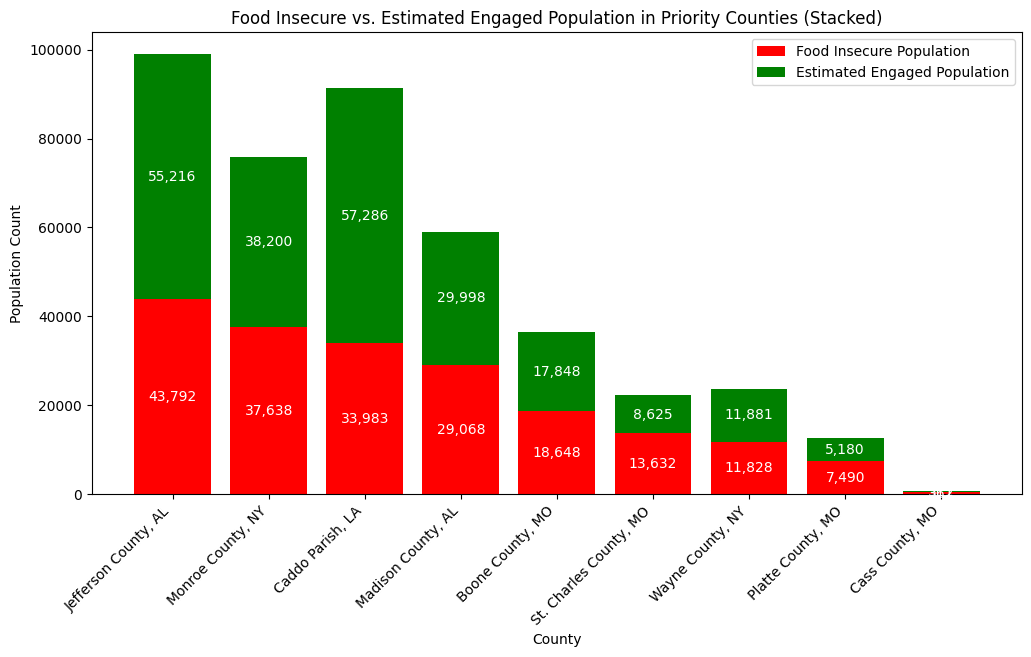

In [12]:
import matplotlib.pyplot as plt
import numpy as np

#Sort data for better visualization
df_priority_sorted = df_priority_grouped.sort_values(by="Total_Food_Insecure", ascending=False)

#Set figure size
plt.figure(figsize=(12, 6))

#Define x-axis labels and positions
counties = df_priority_sorted["County_Name"]
x = np.arange(len(counties))

#Create stacked bar chart
plt.bar(x, df_priority_sorted["Total_Food_Insecure"], color='red', label="Food Insecure Population")
plt.bar(x, df_priority_sorted["Estimated_Engaged"], color='green', label="Estimated Engaged Population", bottom=df_priority_sorted["Total_Food_Insecure"])

#Add labels to bars
for i in range(len(counties)):
    plt.text(x[i], df_priority_sorted["Total_Food_Insecure"].iloc[i] / 2, f"{df_priority_sorted['Total_Food_Insecure'].iloc[i]:,}", ha='center', va='center', fontsize=10, color="white")
    plt.text(x[i], df_priority_sorted["Total_Food_Insecure"].iloc[i] + df_priority_sorted["Estimated_Engaged"].iloc[i] / 2, f"{df_priority_sorted['Estimated_Engaged'].iloc[i]:,}", ha='center', va='center', fontsize=10, color="white")

#Format plot
plt.xticks(x, counties, rotation=45, ha='right')
plt.xlabel("County")
plt.ylabel("Population Count")
plt.title("Food Insecure vs. Estimated Engaged Population in Priority Counties (Stacked)")
plt.legend()

plt.show()


**3.	Which subgroup of the population might benefit the most from the program?**

In [21]:
#Convert relevant columns to numeric
numeric_columns = [
    "PCT_18YOUNGER10", "PCT_65OLDER10", "POVRATE15", "CHILDPOVRATE15",
    "FOODINSEC_15_17", "PCT_SNAP17", "PCT_WIC17", "PCT_FREE_LUNCH15"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Impute missing values using median
df["PCT_FREE_LUNCH15"].fillna(df["PCT_FREE_LUNCH15"].median(), inplace=True)

#Define subgroups using percentile-based thresholds
df["Low_Income_Families"] = df["POVRATE15"] > df["POVRATE15"].median()
df["Children_In_Need"] = df["CHILDPOVRATE15"] > df["CHILDPOVRATE15"].median()
df["Seniors_At_Risk"] = (df["PCT_65OLDER10"] > df["PCT_65OLDER10"].median()) & (df["PCT_SNAP17"] < df["PCT_SNAP17"].median())
df["Food_Insecurity_Gap"] = (df["FOODINSEC_15_17"] > df["FOODINSEC_15_17"].median()) & (df["PCT_FREE_LUNCH15"] < df["PCT_FREE_LUNCH15"].median())

#Count number of counties per subgroup
subgroup_counts = df[["Low_Income_Families", "Children_In_Need", "Seniors_At_Risk", "Food_Insecurity_Gap"]].sum()

<ipython-input-21-9debdb5c9ae2>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PCT_FREE_LUNCH15"].fillna(df["PCT_FREE_LUNCH15"].median(), inplace=True)


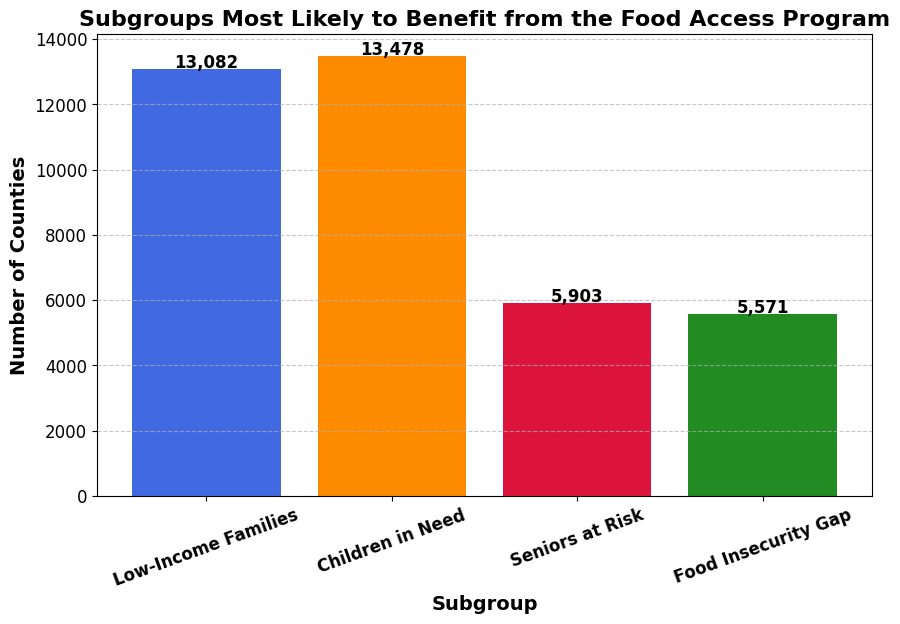

In [24]:
import matplotlib.pyplot as plt


subgroup_labels = ["Low-Income Families", "Children in Need", "Seniors at Risk", "Food Insecurity Gap"]
colors = ["royalblue", "darkorange", "crimson", "forestgreen"]
plt.figure(figsize=(10, 6))

#plot bar chart with labeled bars
bars = plt.bar(subgroup_labels, subgroup_counts, color=colors)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, f"{int(bar.get_height()):,}",
             ha='center', fontsize=12, fontweight='bold', color="black")


plt.xlabel("Subgroup", fontsize=14, fontweight='bold')
plt.ylabel("Number of Counties", fontsize=14, fontweight='bold')
plt.title("Subgroups Most Likely to Benefit from the Food Access Program", fontsize=16, fontweight='bold')
plt.xticks(rotation=20, fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


Low-income families and children in need dominate in terms of affected counties, emphasizing the need for targeted interventions in these areas.
Seniors and food-insecure populations with limited program participation also represent crucial areas for intervention, as they may face barriers in accessing aid.

**4.What is the projected impact of this program?**

In [28]:


#Convert relevant columns to numeric for impact analysis
numeric_columns = [
    "PCT_LACCESS_POP10", "PCT_LACCESS_LOWI10", "POVRATE15", "CHILDPOVRATE15",
    "FOODINSEC_15_17", "VLFOODSEC_15_17", "PCT_SNAP17", "PCT_FREE_LUNCH15",
    "PCT_WIC17", "OBESITY_CrudePrev", "DIABETES_CrudePrev", "PHLTH_CrudePrev",
    "Population2010"
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#Define impact metrics before and after program implementation
impact_estimates = {
    "Reduction in Food Insecurity (%)": 10,  # Expected 10% reduction in food insecurity
    "Increase in SNAP Participation (%)": 5,  # Increase in SNAP participation
    "Increase in Free Lunch (%)": 5,  # Increase in Free Lunch participation
    "Reduction in Child Poverty (%)": 3,  # Expected reduction in child poverty
}

#Compute projected impact
df["Projected_Food_Insecure_Reduction"] = (df["FOODINSEC_15_17"] * (impact_estimates["Reduction in Food Insecurity (%)"] / 100)).round(2)
df["Projected_SNAP_Increase"] = (df["PCT_SNAP17"] * (impact_estimates["Increase in SNAP Participation (%)"] / 100)).round(2)
df["Projected_Free_Lunch_Increase"] = (df["PCT_FREE_LUNCH15"] * (impact_estimates["Increase in Free Lunch (%)"] / 100)).round(2)
df["Projected_Child_Poverty_Reduction"] = (df["CHILDPOVRATE15"] * (impact_estimates["Reduction in Child Poverty (%)"] / 100)).round(2)

#Aggregate projections
impact_summary = {
    "Total Reduction in Food Insecure Population": (df["Projected_Food_Insecure_Reduction"] * df["Population2010"] / 100).sum().astype(int),
    "Total Increase in SNAP Participants": (df["Projected_SNAP_Increase"] * df["Population2010"] / 100).sum().astype(int),
    "Total Increase in Free Lunch Participants": (df["Projected_Free_Lunch_Increase"] * df["Population2010"] / 100).sum().astype(int),
    "Total Reduction in Child Poverty Cases": (df["Projected_Child_Poverty_Reduction"] * df["Population2010"] / 100).sum().astype(int),
}

#Display summary
impact_summary_df = pd.DataFrame(list(impact_summary.items()), columns=["Impact Metric", "Projected Value"])

impact_summary_df

,Impact Metric,Projected Value
0,Total Reduction in Food Insecure Population,1327554
1,Total Increase in SNAP Participants,654997
2,Total Increase in Free Lunch Participants,2576466
3,Total Reduction in Child Poverty Cases,689912


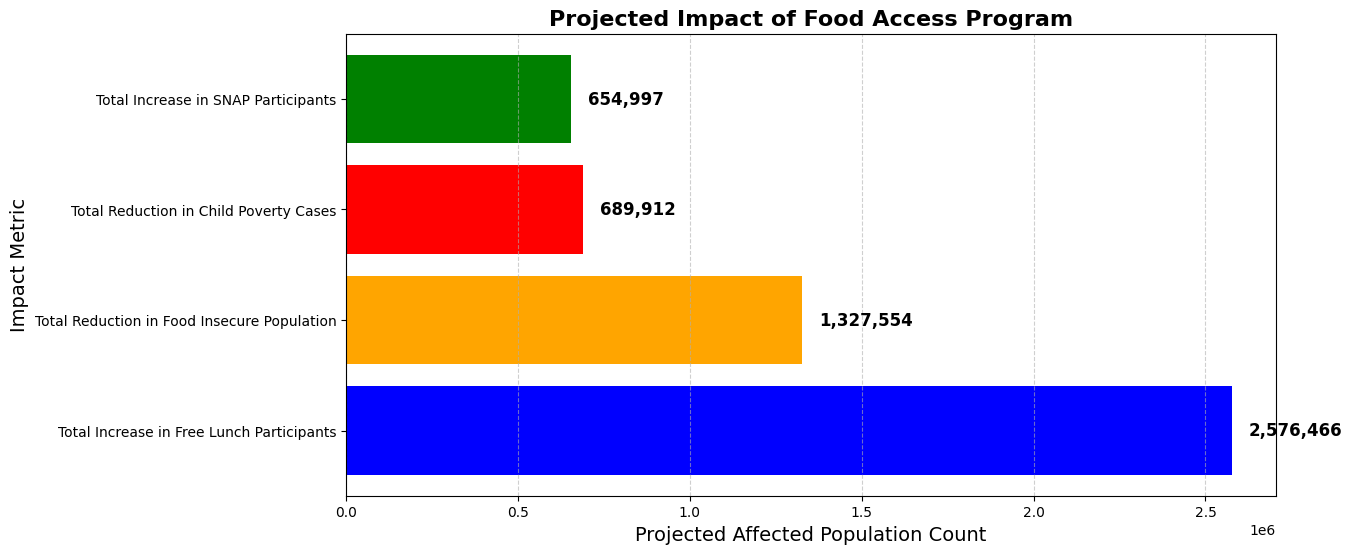

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

impact_summary_df = {
    "Impact Metric": [
        "Total Increase in Free Lunch Participants",
        "Total Reduction in Food Insecure Population",
        "Total Reduction in Child Poverty Cases",
        "Total Increase in SNAP Participants"
    ],
    "Projected Value": [2576466, 1327554, 689912, 654997]  # Sorted values for better visualization
}


df_impact = pd.DataFrame(impact_summary_df
df_impact = df_impact.sort_values(by="Projected Value", ascending=True)
plt.figure(figsize=(12, 6))

bars = plt.barh(df_impact["Impact Metric"], df_impact["Projected Value"],
                color=['green', 'red', 'orange', 'blue'])


for bar in bars:
    plt.text(bar.get_width() + 50000, bar.get_y() + bar.get_height()/2, f"{int(bar.get_width()):,}",
             va='center', ha='left', fontsize=12, fontweight='bold', color="black")


plt.xlabel("Projected Affected Population Count", fontsize=14)
plt.ylabel("Impact Metric", fontsize=14)
plt.title("Projected Impact of Food Access Program", fontsize=16, fontweight='bold')
plt.gca().invert_yaxis()  # Highest impact metric at the top
plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.show()


The largest impact is expected in the Increase in Free Lunch Participants (2,576,466 people).
The second biggest impact is in the Reduction in Food Insecure Population (1,327,554 people).
SNAP participation is projected to increase by 654,997 people.
Child poverty cases are expected to decrease by 689,912 cases.